In [3]:
import os
from PIL import Image
import numpy as np
import os
 

X = []
y = []

base_path='./dataset/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            X_i = Image.open(os.path.join(sub_path, data_file))
            X_i = np.array(X_i.resize((120,120))) / 255.0
            X.append(X_i)
            y.append(child)
print(X)
print(y)

[array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]]), array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
  

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), 
                                                    test_size=0.2, random_state=42)
#X_train=X_train.reshape([-1,120,120,1])
#X_test=X_test.reshape([-1,120,120,1])


import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D(10, (3,3), activation="relu", 
                           input_shape=(120,120,3)))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.Flatten())

cnnModel.add(layers.Dense(64, activation="relu"))

cnnModel.add(layers.Dense(32, activation="relu"))

cnnModel.add(layers.Dense(1, activation="sigmoid"))

cnnModel.summary()


cnnModel.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])


cnnModel.fit(X_train, y_train, epochs=20, batch_size=32)

testLoss, testAccuracy = cnnModel.evaluate(X_test, y_test)

print(testAccuracy)

cnnModel.save_weights('./my_checkpoint')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        5824      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [6]:
y_pred = (cnnModel.predict(X_test) > 0.5).astype("int32")

In [7]:
y_pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

print(y_pred)

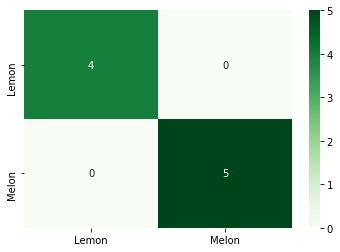

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='Greens', annot=True, xticklabels = ["Lemon", "Melon"],yticklabels = ["Lemon", "Melon"])


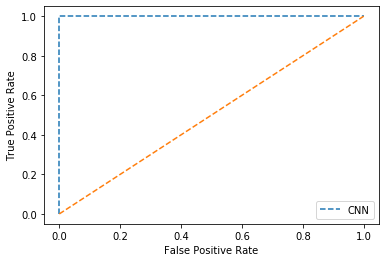

In [9]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

pred_prob = cnnModel.predict(X_test)
pr1, tpr1, thresh1 = roc_curve(y_test, pred_prob, pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(pr1, tpr1, linestyle='--', label='CNN')
plt.plot(p_fpr, p_tpr, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/